In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 5)

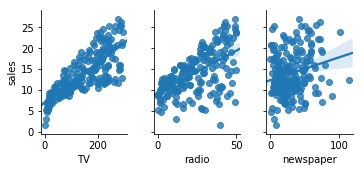

In [9]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,x_vars = ['TV','radio','newspaper'],y_vars='sales',aspect = 0.7,kind='reg')

In [10]:
x = data[['TV','radio','newspaper']]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
y = data['sales']
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(200,)

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 1)

In [14]:
#by default train_test_split uses 25 of the data for testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [17]:
features_col = ['TV','radio','newspaper']
zipped = list(zip(features_col,linreg.coef_))
print(zipped)

[('TV', 0.04656456787415029), ('radio', 0.17915812245088839), ('newspaper', 0.003450464711180378)]


In [18]:
y_pred = linreg.predict(x_test)

In [19]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

1.404651423032895


In [21]:
feature_col = ['TV','radio']

x = data[feature_col]
y = data.sales

x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 1)

linreg.fit(x_train , y_train)

y_pred = linreg.predict(x_test)

print(np.sqrt(metrics.mean_squared_error(y_test , y_pred)))


1.3879034699382886
